In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ini=pd.read_csv('titanic.csv')
df_ini.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df_ini.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
for feature in df_ini.columns[:]:
    if df_ini[feature].dtype!='object':        
        df_ini[feature]=np.where(df_ini[feature].isnull(),df_ini[feature].median(),df_ini[feature])
    else:
        df_ini[feature]=np.where(df_ini[feature].isnull(),df_ini[feature].value_counts().index[0],df_ini[feature])
df_aim=df_ini

In [5]:
df_aim.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,B96 B98,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,28.0,0.0,0.0,330877,8.4583,B96 B98,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,B96 B98,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,B96 B98,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,B96 B98,C


In [6]:
df_aim.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
df_aim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [8]:
def reol(feature1):
    IQR=df_aim[feature1].quantile(0.75)-df_aim[feature1].quantile(0.25)
    lbound=df_aim[feature1].quantile(0.25)-(IQR*1.5)
    ubound=df_aim[feature1].quantile(0.75)+(IQR*1.5)
    df_aim.loc[df_aim[feature1]<=lbound,feature1]=lbound
    df_aim.loc[df_aim[feature1]>=ubound,feature1]=ubound
df_aol=df_aim

In [9]:
for feature in df_aim.columns[:]:
    if df_aim[feature].dtype!='object':
        reol(feature)

In [10]:
df_aol.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6344,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,B96 B98,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,28.0,0.0,0.0,330877,8.4583,B96 B98,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.5,2.5,0.0,349909,21.0750,B96 B98,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,0.0,347742,11.1333,B96 B98,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,B96 B98,C


In [11]:
df_aol.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df_aol_cont1=df_aol.select_dtypes(exclude=[object])
df_aol_cont1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
df_aol_cont2=df_aol_cont1.drop(columns='Pclass',axis=1) #Dropping categorical ordinal features
df_aol_cont2.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
df_aol_cont3=df_aol_cont2.drop('Survived',axis=1)#varience threshold can be applied for independent features only
df_aol_cont3.columns                             #So we drop the Dependent feature Survived

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [15]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df_aol_cont3)

VarianceThreshold(threshold=0)

In [16]:
const_features=[column for column in df_aol_cont3.columns\
               if column not in df_aol_cont3.columns[var_thres.get_support()]]

In [17]:
const_features

['Parch']

In [18]:
df_aol=df_aol.drop(const_features,axis=1)#Dropping constant features
df_aol.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df_aol_cont3=df_aol_cont3.drop(columns=const_features,axis=1)
df_aol_cont3.columns

Index(['PassengerId', 'Age', 'SibSp', 'Fare'], dtype='object')

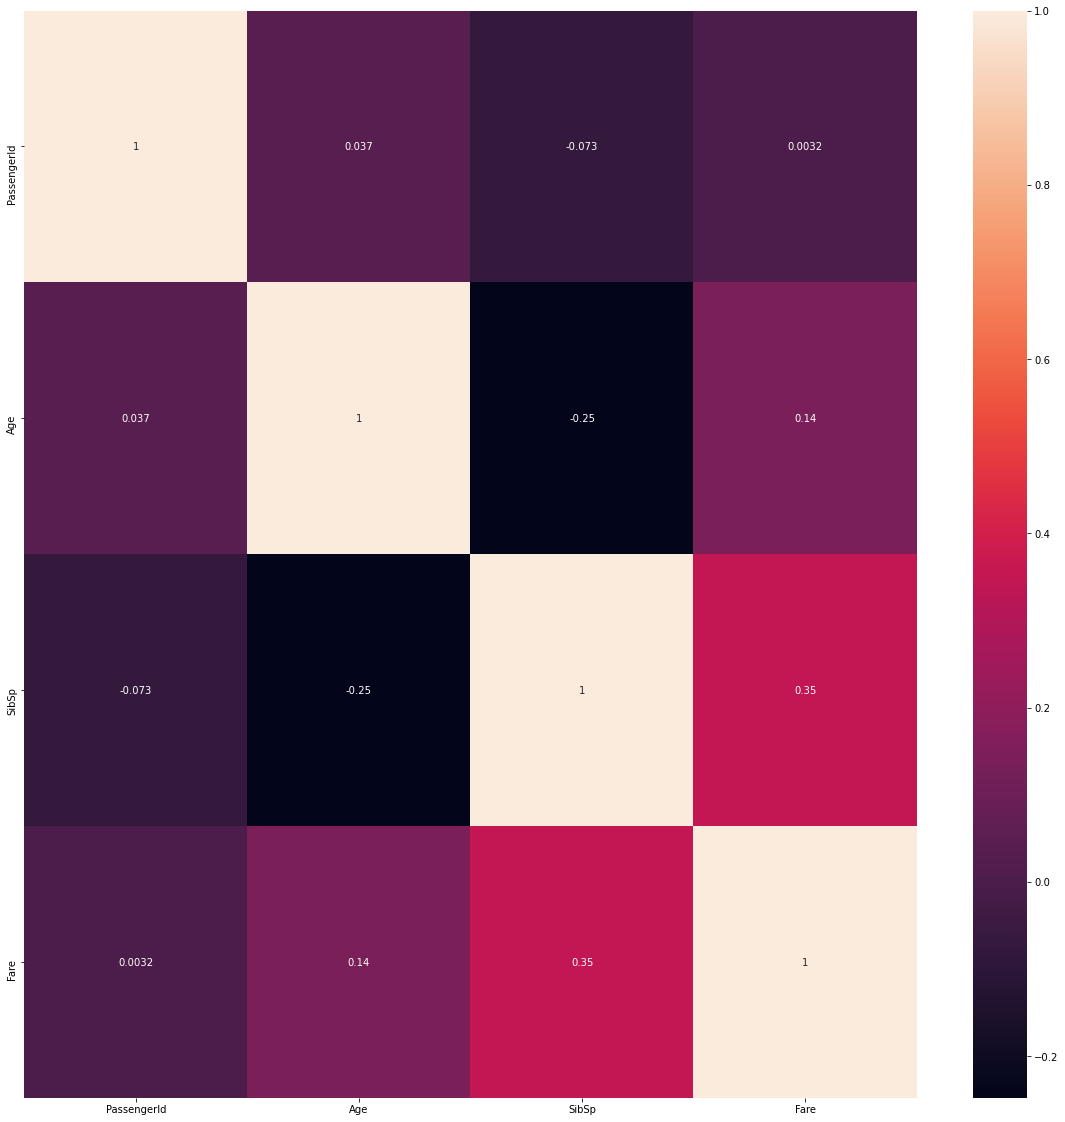

In [20]:
X=df_aol_cont3
y=df_aol_cont2['Survived']
plt.figure(figsize=(20,20))
cor=X.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [21]:
def pcc(dataset,threshold):
    dropset=set()
    cor_mat=dataset.corr()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i,j])>=threshold:
                cor_feat=cor_mat.columns[i]
                dropset.add(cor_feat)
    return dropset 
dropset1=pcc(X,0.85)
print("The Features to be Dropped are...")
dropset1

The Features to be Dropped are...


set()

In [22]:
df_aol=df_aol.drop(columns=dropset1,axis=1)

In [23]:
def enc(feature1):
    key_labels=df_aol[feature1].unique()
    dict={k:i for i,k in enumerate(key_labels,0)}
    df_aol[feature1]=df_aol[feature1].map(dict)

In [24]:
for feature in df_aol.columns[:]:
    if df_aol[feature].dtype=='object':
        enc(feature)
df_aec=df_aol
df_aec.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,0,0,22.0,1.0,0,7.2500,0,0
1,2.0,1.0,1.0,1,1,38.0,1.0,1,65.6344,1,1
2,3.0,1.0,3.0,2,1,26.0,0.0,2,7.9250,0,0
3,4.0,1.0,1.0,3,1,35.0,1.0,3,53.1000,2,0
4,5.0,0.0,3.0,4,0,35.0,0.0,4,8.0500,0,0
5,6.0,0.0,3.0,5,0,28.0,0.0,5,8.4583,0,2
6,7.0,0.0,1.0,6,0,54.0,0.0,6,51.8625,3,0
7,8.0,0.0,3.0,7,0,2.5,2.5,7,21.0750,0,0
8,9.0,1.0,3.0,8,1,27.0,0.0,8,11.1333,0,0
9,10.0,1.0,2.0,9,1,14.0,1.0,9,30.0708,0,1


In [25]:
from sklearn.feature_selection import mutual_info_classif
X=df_aec.drop(columns='Survived',axis=1)
y=df_aec['Survived']
mut_inf_data=mutual_info_classif(X,y,random_state=0)
mut_inf_modif=pd.Series(mut_inf_data,index=X.columns)
mut_inf_sorted=mut_inf_modif.sort_values(ascending=False)
dict=mut_inf_sorted.to_dict()
dict

{'Sex': 0.1537120485437493,
 'Fare': 0.10730960975235937,
 'Ticket': 0.08472709935430367,
 'Pclass': 0.04247593791441573,
 'Cabin': 0.03423587257989058,
 'Embarked': 0.025006881411639315,
 'SibSp': 0.02381915341336538,
 'Name': 0.013788954037047496,
 'PassengerId': 0.00953468260115553,
 'Age': 0.0}

In [26]:
droplist=[]
for key in dict:
    if dict[key]<0.001:
        droplist.append(key)
droplist

['Age']

In [27]:
df_aec=df_aec.drop(columns=droplist,axis=1)

In [28]:
df_aec.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
df_aim_cate1=df_aim.select_dtypes(include=[object])#For imbalanced data check,include all categorical features+Dep. feature

In [30]:
df_aim_cate1.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [31]:
df_aim_cate2=df_aim[['Pclass','Survived']].copy()#include categorical ordinal feature and
df_aim_cate=pd.concat([df_aim_cate1,df_aim_cate2],axis=1)#dependent feature in the new Data frame.
df_aim_cate.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass', 'Survived'], dtype='object')

In [32]:
imb_chk_list=list()

In [33]:
for feature in df_aim_cate.columns[:]:
    length=int(len(df_aim_cate[feature].unique()))      
    if length <= 5:
        imb_chk_list.append(feature)

In [34]:
imb_chk_list

['Sex', 'Embarked', 'Pclass', 'Survived']

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
def disp_plots(feature):
    sns.countplot(df_aol[feature])    

In [37]:
pd.crosstab(df_aim['Sex'],columns='%',normalize=True)       

col_0,%
Sex,
female,0.352413
male,0.647587


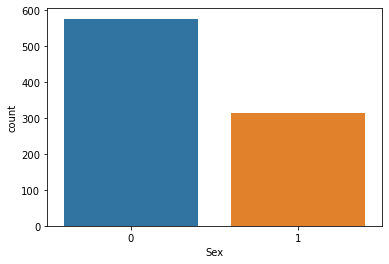

In [38]:
disp_plots('Sex')

In [39]:
pd.crosstab(df_aim['Embarked'],columns='%',normalize=True)

col_0,%
Embarked,
C,0.188552
Q,0.086420
S,0.725028


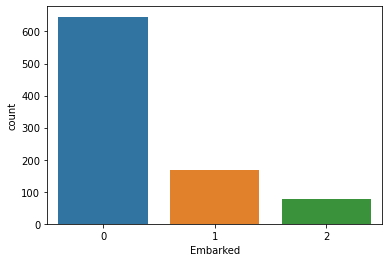

In [40]:
disp_plots('Embarked')

In [41]:
pd.crosstab(df_aim['Pclass'],columns='%',normalize=True)

col_0,%
Pclass,
1.0,0.242424
2.0,0.206510
3.0,0.551066


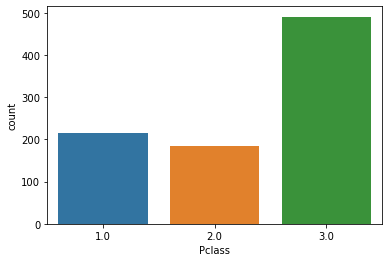

In [42]:
disp_plots('Pclass')

In [43]:
pd.crosstab(df_aim['Survived'],columns='%',normalize=True)

col_0,%
Survived,
0.0,0.616162
1.0,0.383838


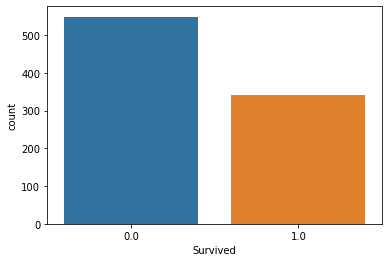

In [44]:
disp_plots('Survived')

<AxesSubplot:>

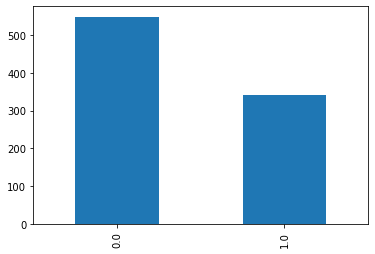

In [45]:
df_aim['Survived'].value_counts().plot.bar()

<AxesSubplot:>

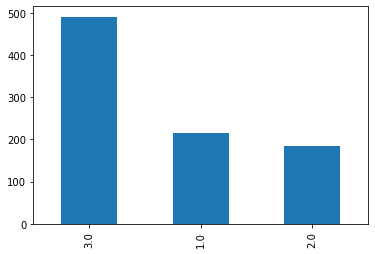

In [46]:
df_aim['Pclass'].value_counts().plot.bar()

<AxesSubplot:>

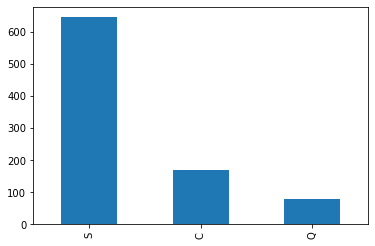

In [47]:
df_aim['Embarked'].value_counts().plot.bar()

<AxesSubplot:>

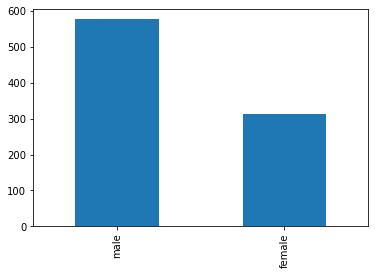

In [48]:
df_aim['Sex'].value_counts().plot.bar()

In [49]:
drop_list=[]#Add the independent features with single category, imbalanced data in this list(Difference of values<0.05 and >0.95)

In [50]:
df_aec=df_aec.drop(drop_list,axis=1)

In [51]:
#If there is imbalanced data in Dependent feature, follow the below steps

In [52]:
# Log-in as Administrator and in anaconda command prompt, type pip install imbalanced-learn
#from sklearn.model_selection import train_test_split
#from imblearn.combine import SMOTETomek
#from collections import Counter
#Counter(y_train)
#X_train,X_test,y_train,y_test=train_test(X,y,train_size=0.7)
#os=SMOTETomek(0.75)
#X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
#print("The number of classes before fit {}".format(Counter(y_train)))
#print("The number of classes after fit {}".format(Counter(y_train_ns)))


In [53]:
#After making the Dependent feature with balanced data we can use this X_train_ns,y_train_ns to proceed for model building

In [54]:
df_aec1=df_aec.copy()
df_aec1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,0,0,1.0,0,7.2500,0,0
1,2.0,1.0,1.0,1,1,1.0,1,65.6344,1,1
2,3.0,1.0,3.0,2,1,0.0,2,7.9250,0,0
3,4.0,1.0,1.0,3,1,1.0,3,53.1000,2,0
4,5.0,0.0,3.0,4,0,0.0,4,8.0500,0,0
5,6.0,0.0,3.0,5,0,0.0,5,8.4583,0,2
6,7.0,0.0,1.0,6,0,0.0,6,51.8625,3,0
7,8.0,0.0,3.0,7,0,2.5,7,21.0750,0,0
8,9.0,1.0,3.0,8,1,0.0,8,11.1333,0,0
9,10.0,1.0,2.0,9,1,1.0,9,30.0708,0,1


In [55]:
import scipy.stats as stat
import pylab

In [56]:
def plot_feature(df,feature2):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature2].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature2],dist='norm',plot=pylab)
    plt.show()

In [57]:
def guas_trans(df,feature1):
    print("Original Distribution of :",feature1)
    plot_feature(df_aec1,feature1)
    print("Logrothmic Transformation of :",feature1)
    df_aec1[feature1+"_log"]=np.log1p(df_aec1[feature1])
    plot_feature(df_aec1,feature1+"_log")
    print("Exponential Transformation of :",feature1)
    df_aec1[feature1+"_expo"]=df_aec1[feature1]**(1/1.2)
    plot_feature(df_aec1,feature1+"_expo")
    print("Square root Transformation of :",feature1)
    df_aec1[feature1+"_sqroot"]=df_aec1[feature1]**(1/2)
    plot_feature(df_aec1,feature1+"_sqroot")
    print("Boxcox Transformation of :",feature1)
    df_aec1[feature1+"_Boxcox"],parameters=stat.boxcox(df_aec1[feature1]+1)
    plot_feature(df_aec1,feature1+"_Boxcox")

Original Distribution of : PassengerId


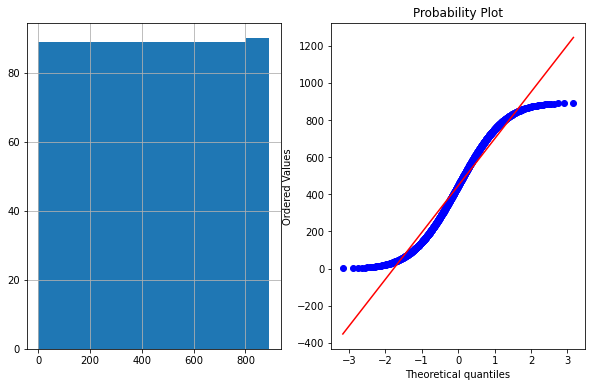

Logrothmic Transformation of : PassengerId


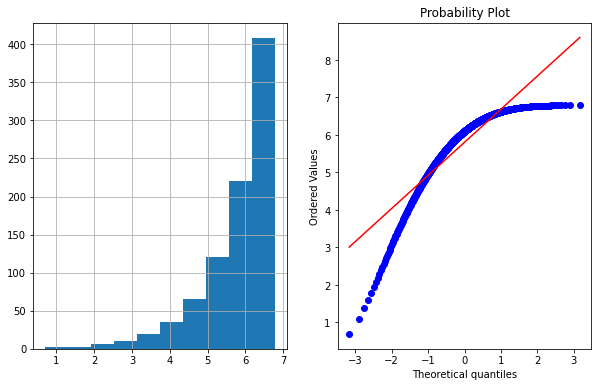

Exponential Transformation of : PassengerId


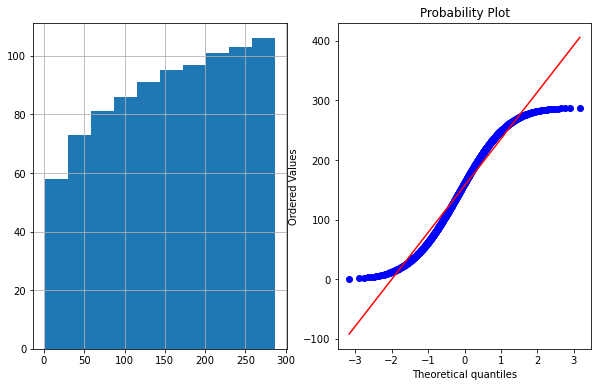

Square root Transformation of : PassengerId


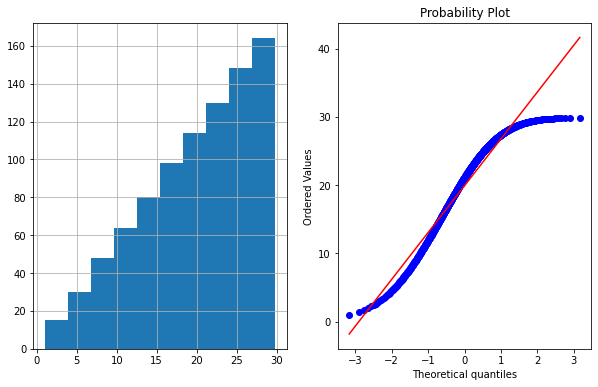

Boxcox Transformation of : PassengerId


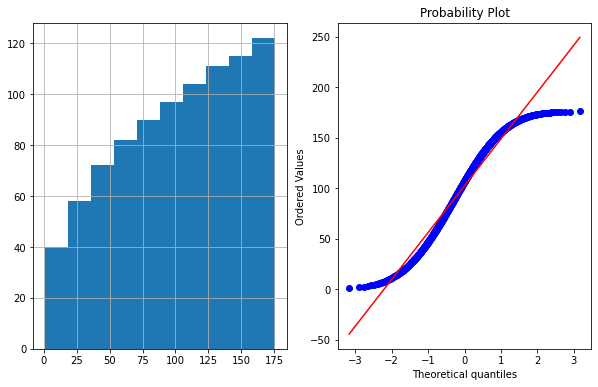

In [58]:
guas_trans(df_aec1,'PassengerId')

Original Distribution of : Name


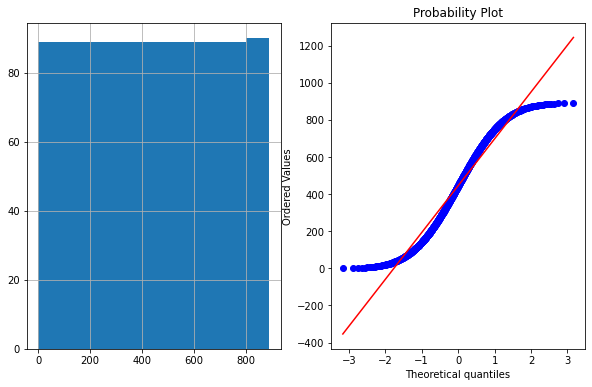

Logrothmic Transformation of : Name


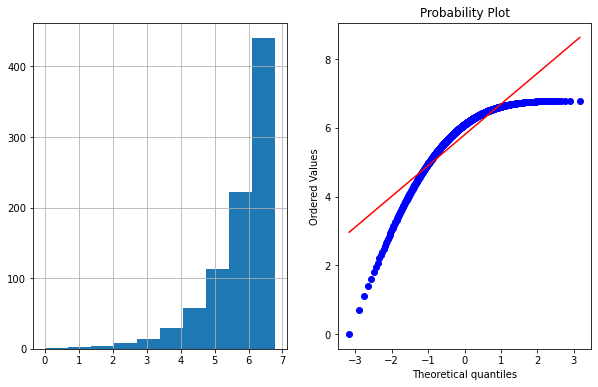

Exponential Transformation of : Name


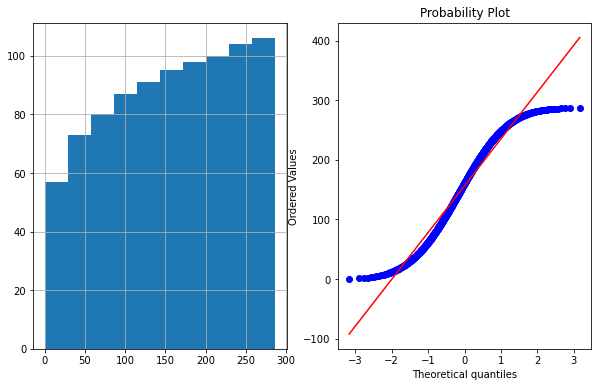

Square root Transformation of : Name


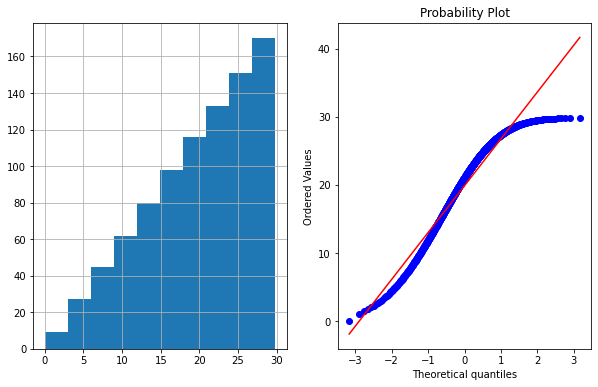

Boxcox Transformation of : Name


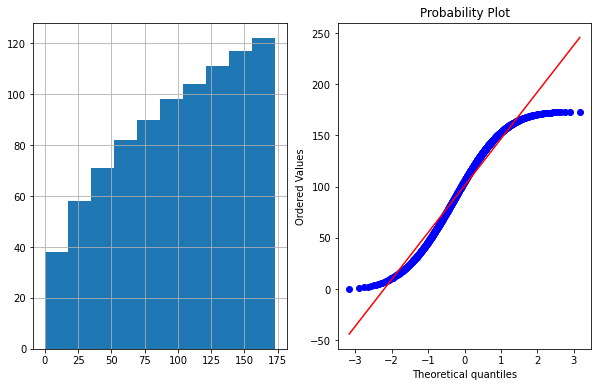

In [59]:
guas_trans(df_aec1,'Name')

Original Distribution of : Fare


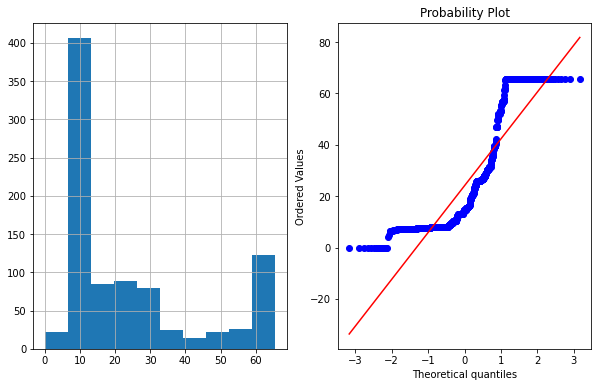

Logrothmic Transformation of : Fare


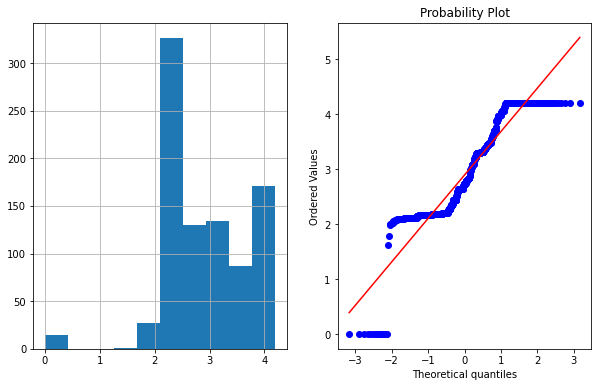

Exponential Transformation of : Fare


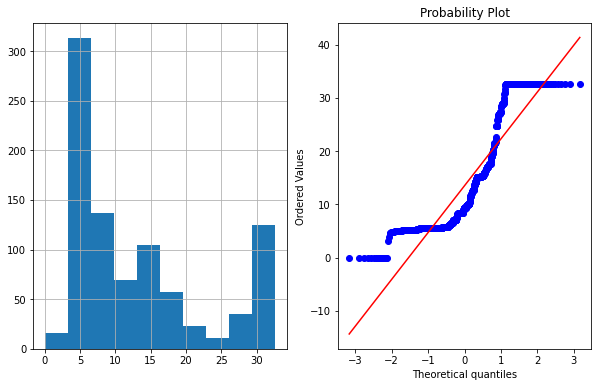

Square root Transformation of : Fare


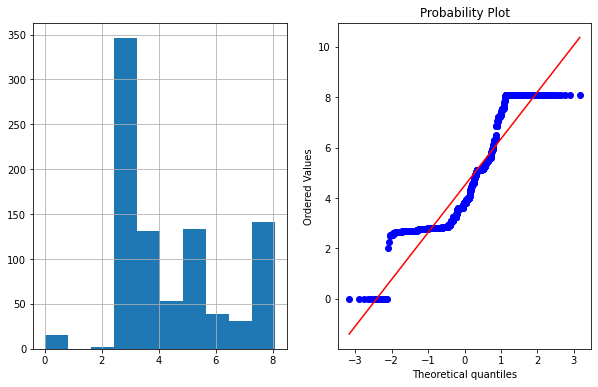

Boxcox Transformation of : Fare


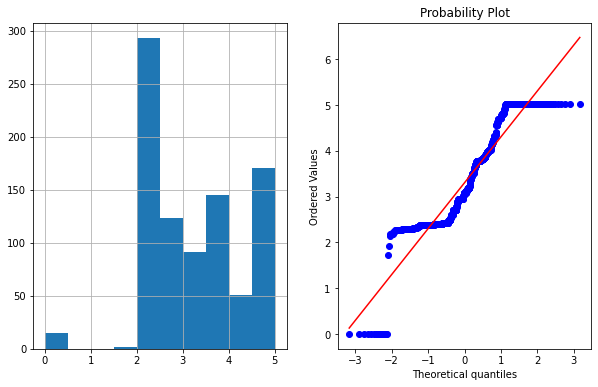

In [60]:
guas_trans(df_aec1,'Fare')

Original Distribution of : Ticket


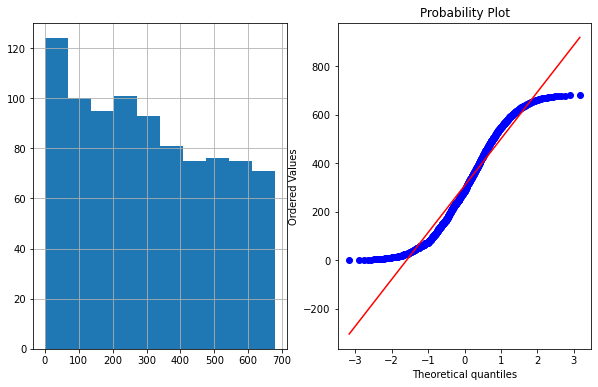

Logrothmic Transformation of : Ticket


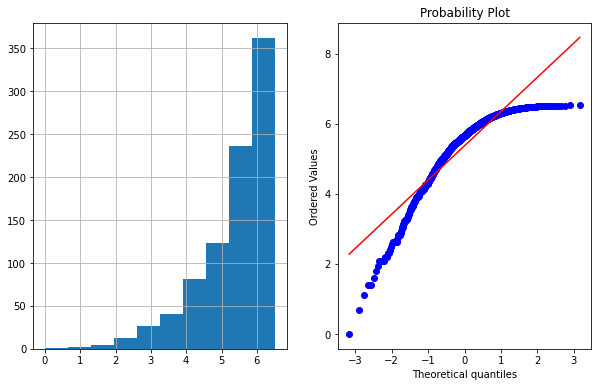

Exponential Transformation of : Ticket


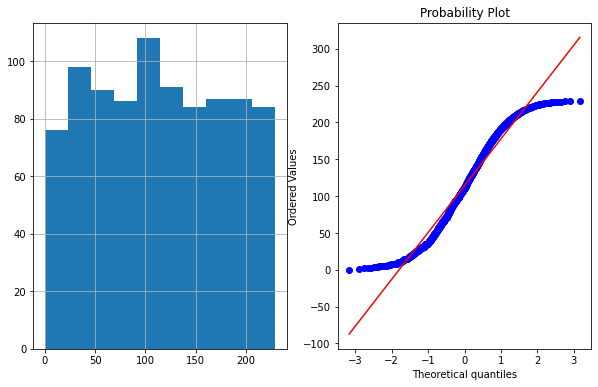

Square root Transformation of : Ticket


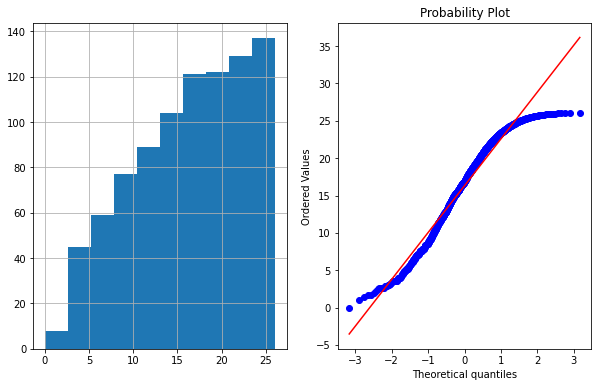

Boxcox Transformation of : Ticket


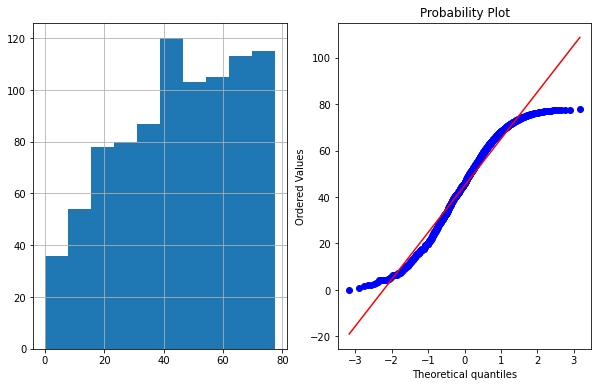

In [61]:
guas_trans(df_aec1,'Ticket')

Original Distribution of : Survived


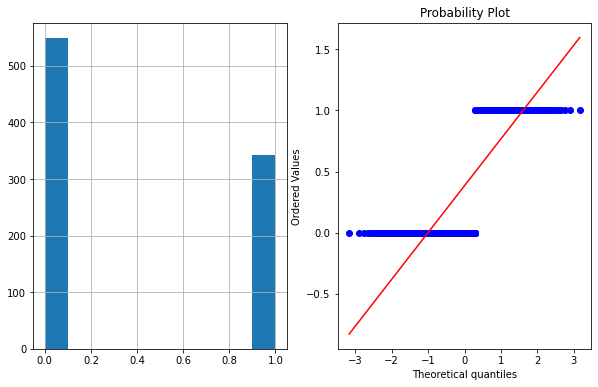

Logrothmic Transformation of : Survived


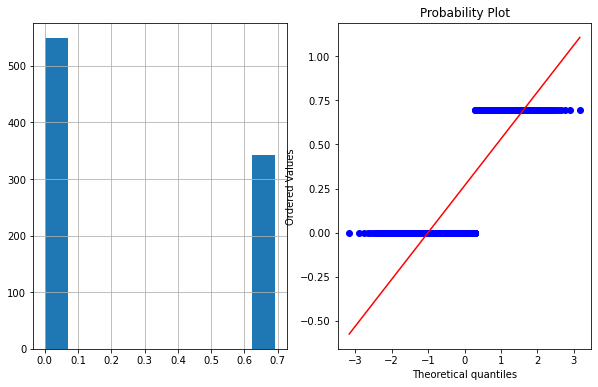

Exponential Transformation of : Survived


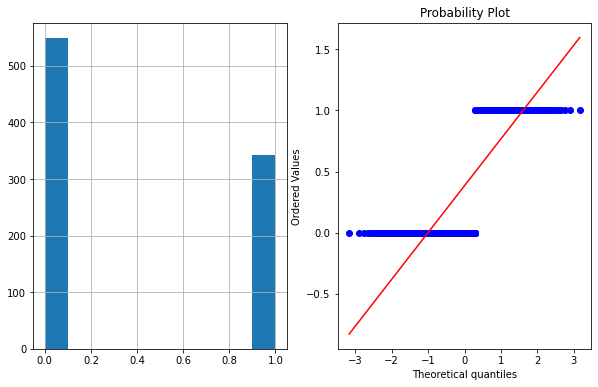

Square root Transformation of : Survived


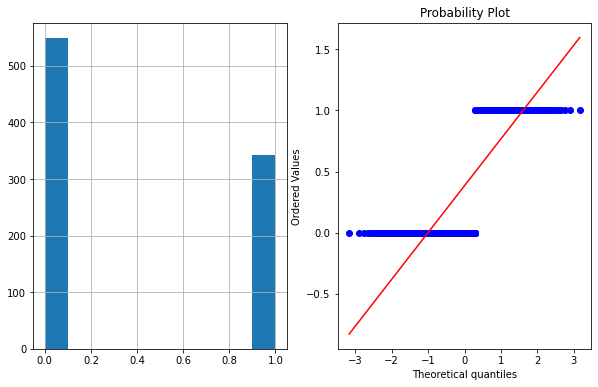

Boxcox Transformation of : Survived


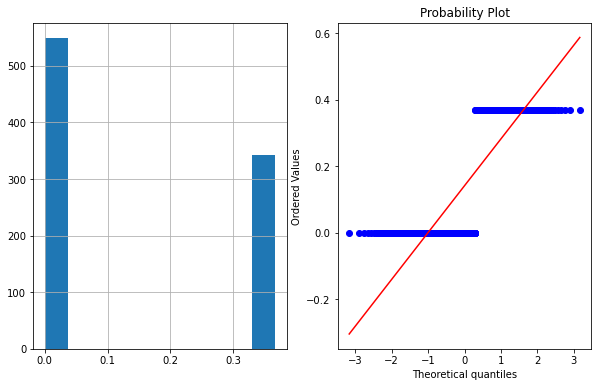

In [62]:
guas_trans(df_aec1,'Survived')

Original Distribution of : Pclass


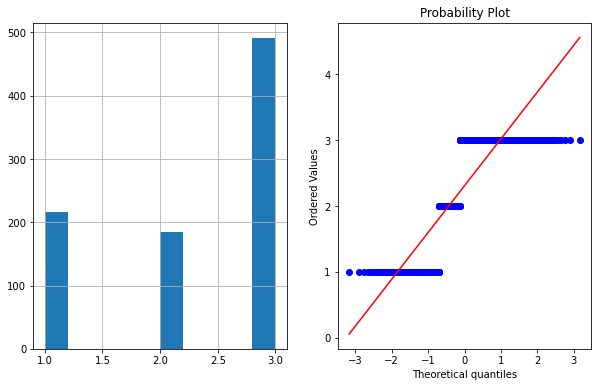

Logrothmic Transformation of : Pclass


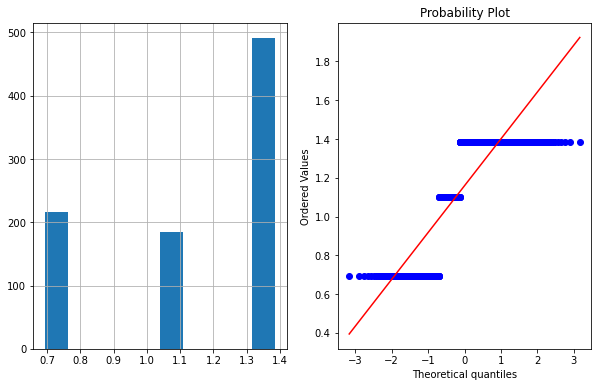

Exponential Transformation of : Pclass


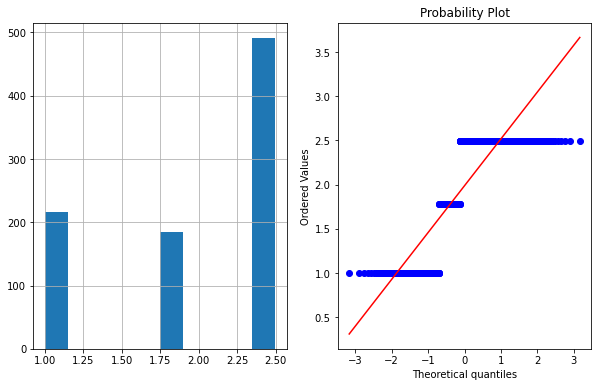

Square root Transformation of : Pclass


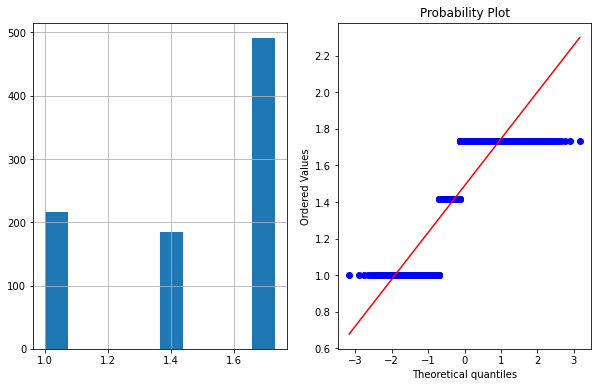

Boxcox Transformation of : Pclass


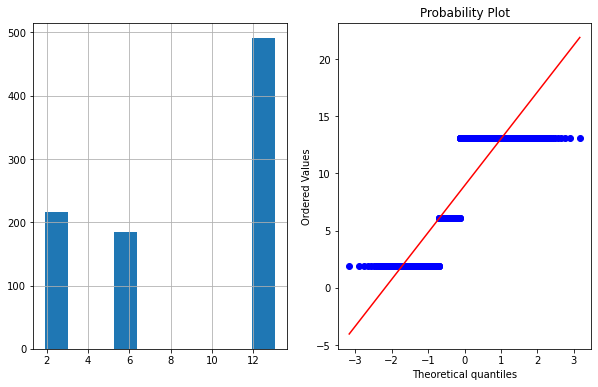

In [63]:
guas_trans(df_aec1,'Pclass')

Original Distribution of : Sex


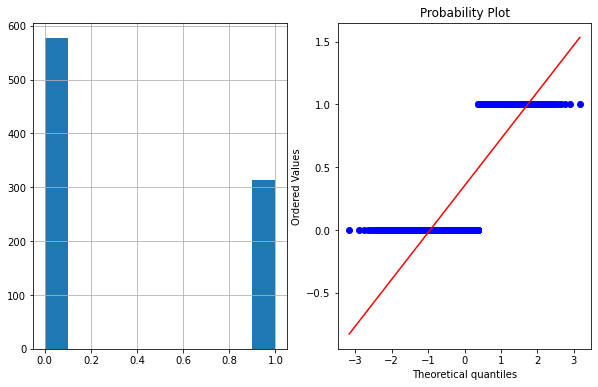

Logrothmic Transformation of : Sex


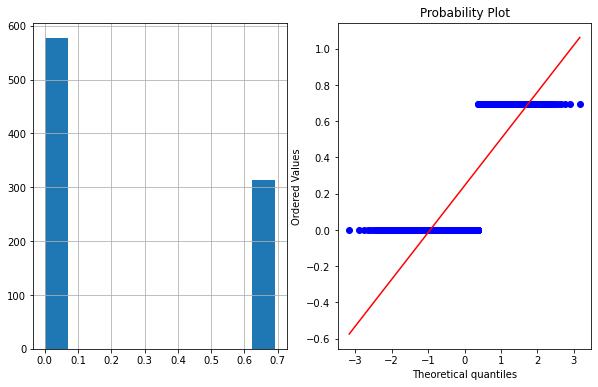

Exponential Transformation of : Sex


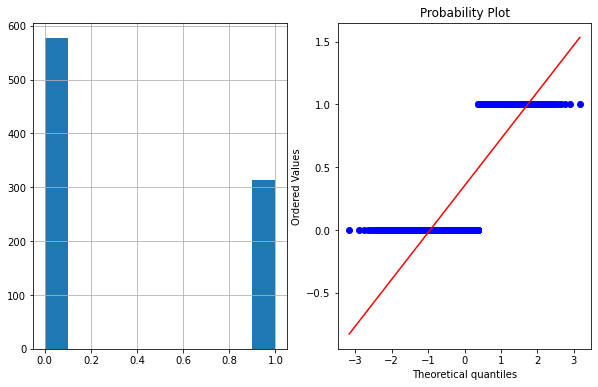

Square root Transformation of : Sex


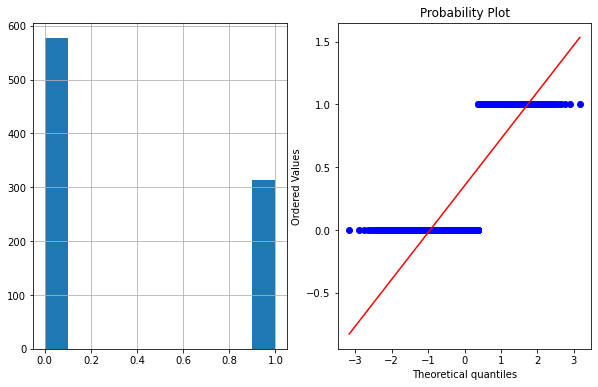

Boxcox Transformation of : Sex


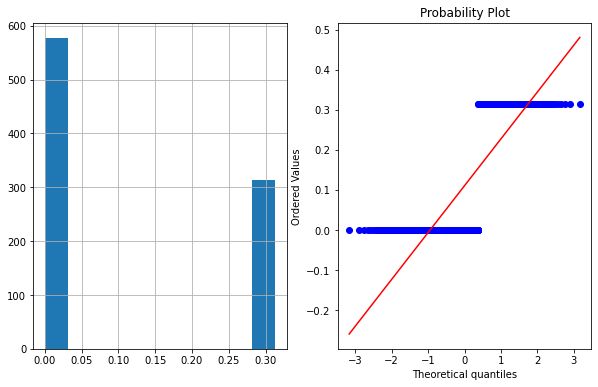

In [64]:
guas_trans(df_aec1,'Sex')

Original Distribution of : SibSp


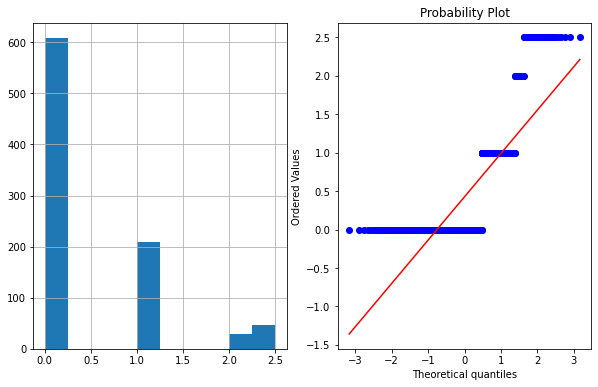

Logrothmic Transformation of : SibSp


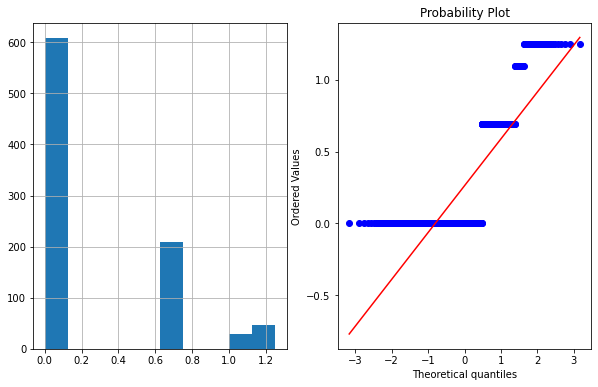

Exponential Transformation of : SibSp


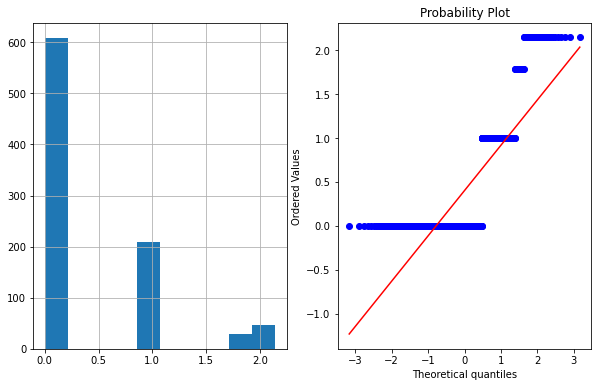

Square root Transformation of : SibSp


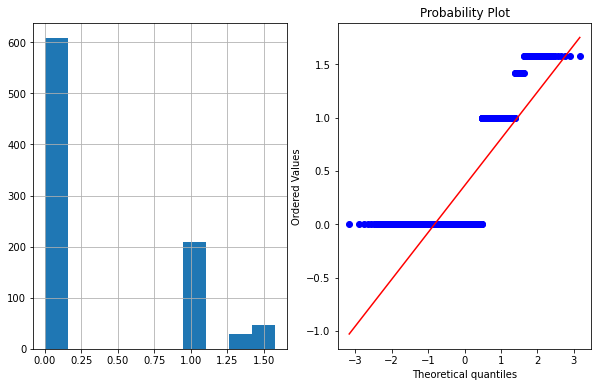

Boxcox Transformation of : SibSp


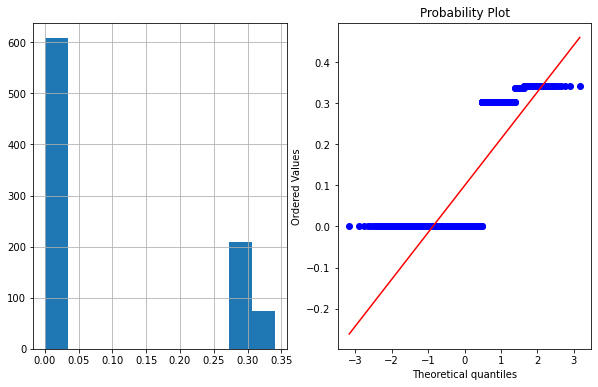

In [65]:
guas_trans(df_aec1,'SibSp')

Original Distribution of : Cabin


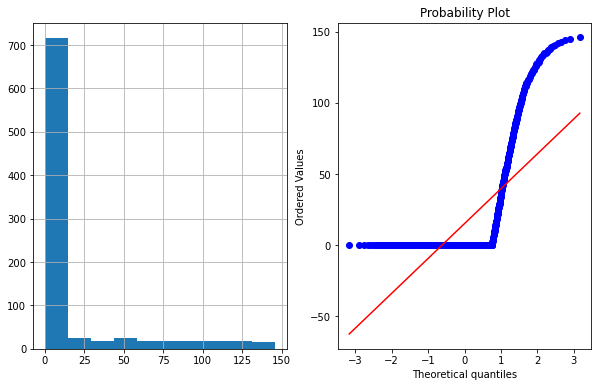

Logrothmic Transformation of : Cabin


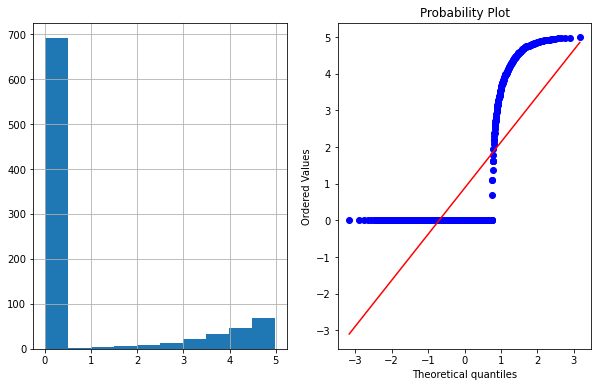

Exponential Transformation of : Cabin


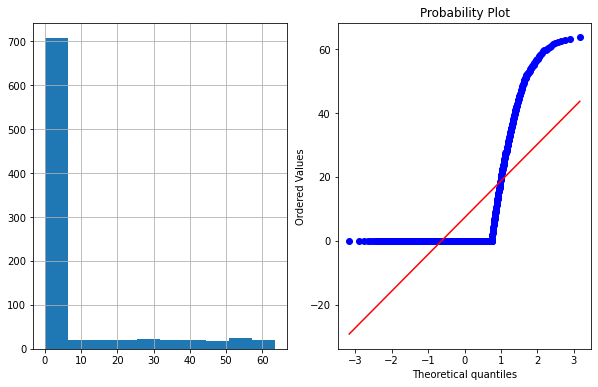

Square root Transformation of : Cabin


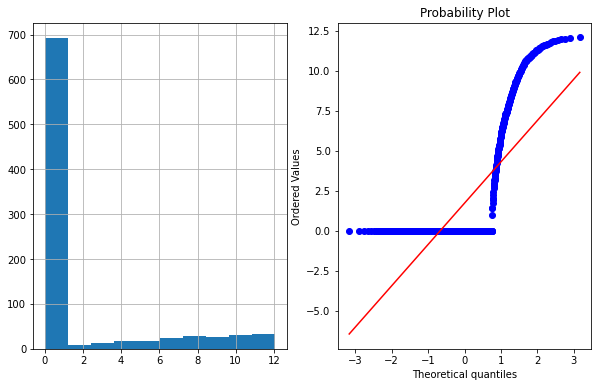

Boxcox Transformation of : Cabin


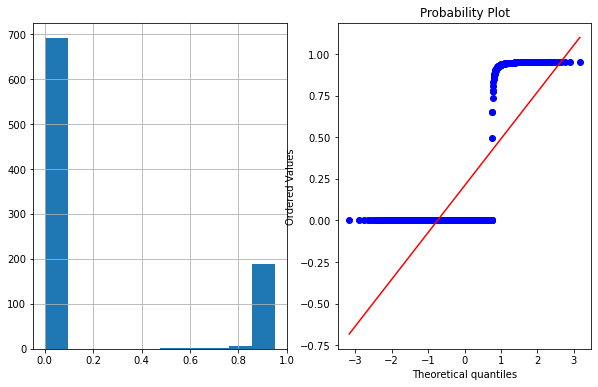

In [66]:
guas_trans(df_aec1,'Cabin')

Original Distribution of : Embarked


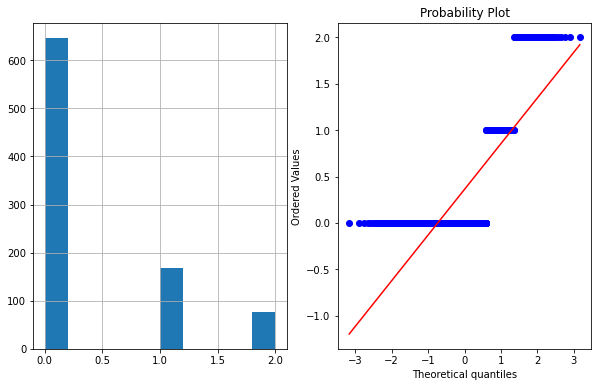

Logrothmic Transformation of : Embarked


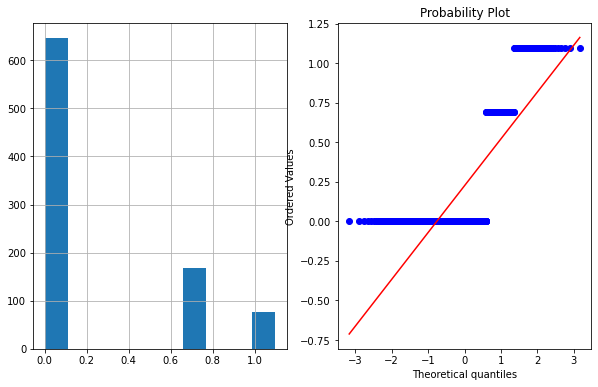

Exponential Transformation of : Embarked


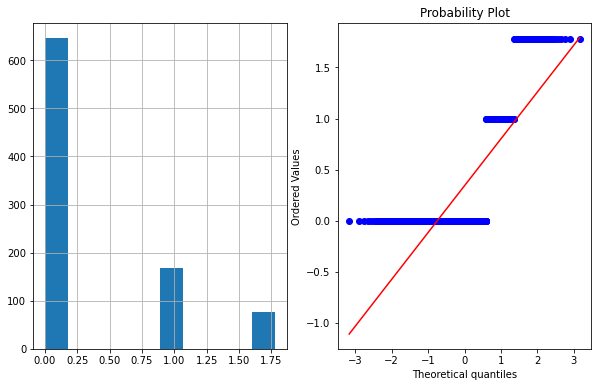

Square root Transformation of : Embarked


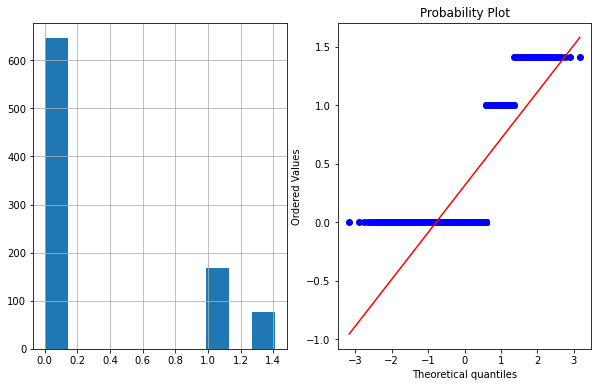

Boxcox Transformation of : Embarked


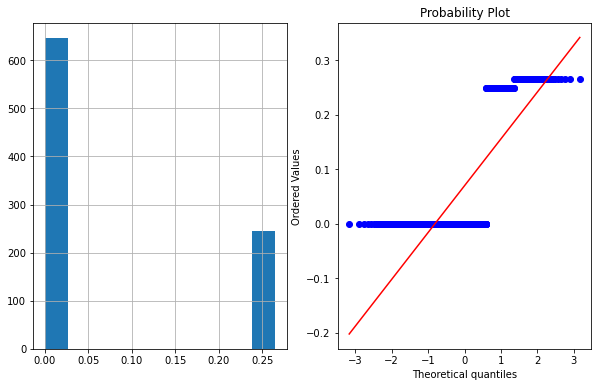

In [67]:
guas_trans(df_aec1,'Embarked')

In [68]:
original_list=['Survived','Pclass','Sex','SibSp','Cabin','Embarked']
log_list=['Fare']
expo_list=[]
sqroot_list=['PassengerId','Name','Ticket']
boxcox_list=[]

In [69]:
df_aec1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'PassengerId_log', 'PassengerId_expo',
       'PassengerId_sqroot', 'PassengerId_Boxcox', 'Name_log', 'Name_expo',
       'Name_sqroot', 'Name_Boxcox', 'Fare_log', 'Fare_expo', 'Fare_sqroot',
       'Fare_Boxcox', 'Ticket_log', 'Ticket_expo', 'Ticket_sqroot',
       'Ticket_Boxcox', 'Survived_log', 'Survived_expo', 'Survived_sqroot',
       'Survived_Boxcox', 'Pclass_log', 'Pclass_expo', 'Pclass_sqroot',
       'Pclass_Boxcox', 'Sex_log', 'Sex_expo', 'Sex_sqroot', 'Sex_Boxcox',
       'SibSp_log', 'SibSp_expo', 'SibSp_sqroot', 'SibSp_Boxcox', 'Cabin_log',
       'Cabin_expo', 'Cabin_sqroot', 'Cabin_Boxcox', 'Embarked_log',
       'Embarked_expo', 'Embarked_sqroot', 'Embarked_Boxcox'],
      dtype='object')

In [70]:
df_aec1.shape

(891, 50)

In [71]:
for feature in log_list:
    df_aec[feature]=np.log1p(df_aec[feature])

In [72]:
for feature in sqroot_list:
    df_aec[feature]=df_aec[feature]**(1/2)

In [73]:
df_atr=df_aec
df_atr.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Ticket,Fare,Cabin,Embarked
0,1.000000,0.0,3.0,0.000000,0,1.0,0.000000,2.110213,0,0
1,1.414214,1.0,1.0,1.000000,1,1.0,1.000000,4.199221,1,1
2,1.732051,1.0,3.0,1.414214,1,0.0,1.414214,2.188856,0,0
3,2.000000,1.0,1.0,1.732051,1,1.0,1.732051,3.990834,2,0
4,2.236068,0.0,3.0,2.000000,0,0.0,2.000000,2.202765,0,0
5,2.449490,0.0,3.0,2.236068,0,0.0,2.236068,2.246893,0,2
6,2.645751,0.0,1.0,2.449490,0,0.0,2.449490,3.967694,3,0
7,2.828427,0.0,3.0,2.645751,0,2.5,2.645751,3.094446,0,0
8,3.000000,1.0,3.0,2.828427,1,0.0,2.828427,2.495954,0,0
9,3.162278,1.0,2.0,3.000000,1,1.0,3.000000,3.436268,0,1


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df_atr)

In [75]:
df_ast=pd.DataFrame(scaled,columns=df_atr.columns)
df_ast.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,0.000000,0.0,0.4,0.000000,0.502525,0.000000,0.0
1,0.014358,1.0,0.0,0.033520,1.0,0.4,0.038348,1.000000,0.006849,0.5
2,0.025375,1.0,1.0,0.047405,1.0,0.0,0.054233,0.521253,0.000000,0.0
3,0.034662,1.0,0.0,0.058058,1.0,0.4,0.066421,0.950375,0.013699,0.0
4,0.042845,0.0,1.0,0.067040,0.0,0.0,0.076696,0.524565,0.000000,0.0
5,0.050243,0.0,1.0,0.074953,0.0,0.0,0.085749,0.535074,0.000000,1.0
6,0.057046,0.0,0.0,0.082107,0.0,0.0,0.093934,0.944864,0.020548,0.0
7,0.063378,0.0,1.0,0.088686,0.0,1.0,0.101460,0.736909,0.000000,0.0
8,0.069325,1.0,1.0,0.094809,1.0,0.0,0.108465,0.594385,0.000000,0.0
9,0.074950,1.0,0.5,0.100560,1.0,0.4,0.115045,0.818311,0.000000,0.5


In [76]:
df_fin=df_ast

In [77]:
X=df_fin.drop(columns='Survived',axis=1)
y=df_fin['Survived']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print("Accuracy Score :",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[150  18]
 [ 30  70]]
Accuracy Score : 0.8208955223880597
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       168
         1.0       0.80      0.70      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [82]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print("Accuracy Score :",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[142  26]
 [ 27  73]]
Accuracy Score : 0.8022388059701493
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       168
         1.0       0.74      0.73      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [84]:
# pip install xgboost
import xgboost
classifier=xgboost.XGBClassifier()
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)

[19:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print("Accuracy Score :",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[149  19]
 [ 32  68]]
Accuracy Score : 0.8097014925373134
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       168
         1.0       0.78      0.68      0.73       100

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



In [86]:
from sklearn import svm
classifier=svm.SVC()
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print("Accuracy Score :",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[151  17]
 [ 35  65]]
Accuracy Score : 0.8059701492537313
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       168
         1.0       0.79      0.65      0.71       100

    accuracy                           0.81       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.81      0.80       268



In [88]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print("Accuracy Score :",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))


[[133  35]
 [ 23  77]]
Accuracy Score : 0.7835820895522388
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       168
         1.0       0.69      0.77      0.73       100

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.78      0.79       268



In [90]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print("Accuracy Score :",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[145  23]
 [ 28  72]]
Accuracy Score : 0.8097014925373134
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       168
         1.0       0.76      0.72      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



In [92]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandistortions=[]

In [93]:
for k in clusters:
    classifier=KMeans(n_clusters=k)
    classifier.fit(df_ast)
    meandistortions.append(sum(np.min(cdist(df_ast,classifier.cluster_centers_, 'euclidean'), axis=1)) / df_ast.shape[0])    

In [94]:
meandistortions

[1.0198241625251847,
 0.8261617000026257,
 0.7678150457359286,
 0.7168527501088069,
 0.6793612622773901,
 0.6351784097374678,
 0.5945329150660839,
 0.5720902598276899,
 0.5509038156058894]

Text(0.5, 1.0, 'Selecting k value with Elbow Method')

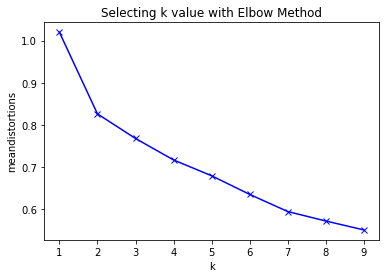

In [95]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(clusters,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('meandistortions')
plt.title('Selecting k value with Elbow Method')

In [96]:
classifier=KMeans(2)
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print("Accuracy Score :",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[ 28 140]
 [ 71  29]]
Accuracy Score : 0.2126865671641791
              precision    recall  f1-score   support

         0.0       0.28      0.17      0.21       168
         1.0       0.17      0.29      0.22       100

    accuracy                           0.21       268
   macro avg       0.23      0.23      0.21       268
weighted avg       0.24      0.21      0.21       268



In [98]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
classifier=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
classifier.fit(df_ast)

AgglomerativeClustering(linkage='complete')

In [99]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [100]:
Z = linkage(df_ast)

In [101]:
accuracy,coph_dists=cophenet(Z,pdist(df_ast))
print("Accuracy Score :",accuracy)

Accuracy Score : 0.7364278038018134
